In [1]:
import sklearn
import pandas as pd
import numpy as np

## Logistic Regression

In [2]:
# Loading and initially checking dataset values
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
data.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# We use train test splitting and sklearn LogisticRegression to get our classification set scores

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    stratify=data.target, random_state=756675)

log_model = LogisticRegression(solver='lbfgs').fit(x_train,y_train)
print("Training set score: {:.3f}".format(log_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(log_model.score(x_test, y_test)))

Training set score: 0.946
Test set score: 0.937


C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


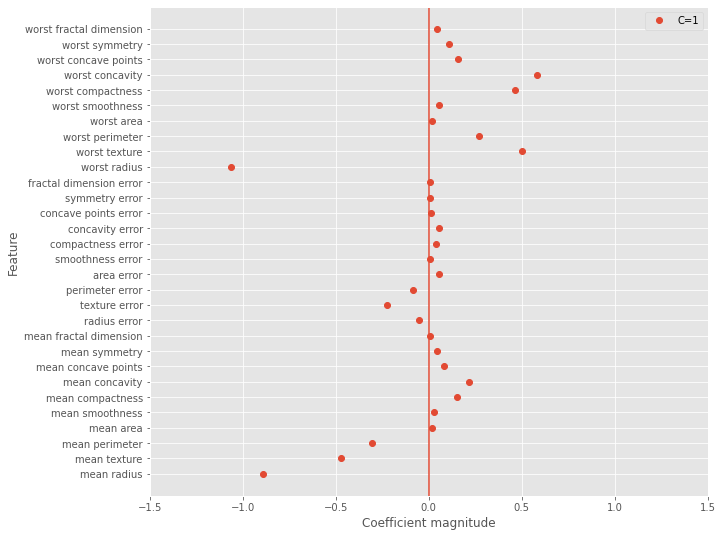

In [4]:
# To visualize the factors which had strong weights/influence on the target, we use a scatter plot
# We see here which features have high coefficients, translating to strong influence on the outcome
# or target. In general, radius, concavity, compactness, perimeter
# and texture all have large effect on whether there is breast cancer.

import matplotlib.pyplot as plt
from matplotlib import transforms
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10,9)

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

plt.plot(log_model.coef_.T, 'o', label="C=1",  transform= rot + base)
#plt.plot(log_model.coef_.T, 'o', label="C=1")
plt.yticks(range(data.data.shape[1]), data.feature_names, rotation=0)
ylims = plt.ylim()
plt.vlines(0, ylims[0], ylims[1])
plt.ylim(ylims)
plt.xlim(-1.5, 1.5)
plt.ylabel("Feature")
plt.xlabel("Coefficient magnitude")
plt.legend()

## Random Forest

In [5]:
#Random Forest Classification using sklearn ensemble

from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_moons

randomforest = RandomForestClassifier(n_estimators=5, random_state=258765)
randomforest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(randomforest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(randomforest.score(x_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.951


(-1.0, 30.0)

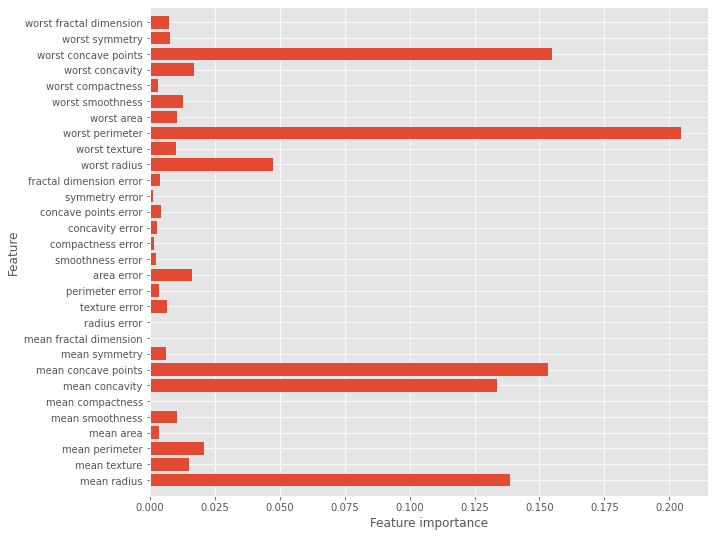

In [6]:
# Doing similar feature analysis, we find that similar feature importance to logistic regression
# is seen here by the model.

n_features = data.data.shape[1]
plt.barh(np.arange(n_features), randomforest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

## Support Vector Machines

In [7]:
# Lastly we use LinearSVC - linear support vector classifiers as the model.

from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C = 1.0).fit(x_train, y_train)
randomforest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(linear_svm.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(linear_svm.score(x_test, y_test)))

Accuracy on training set: 0.932
Accuracy on test set: 0.909


C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


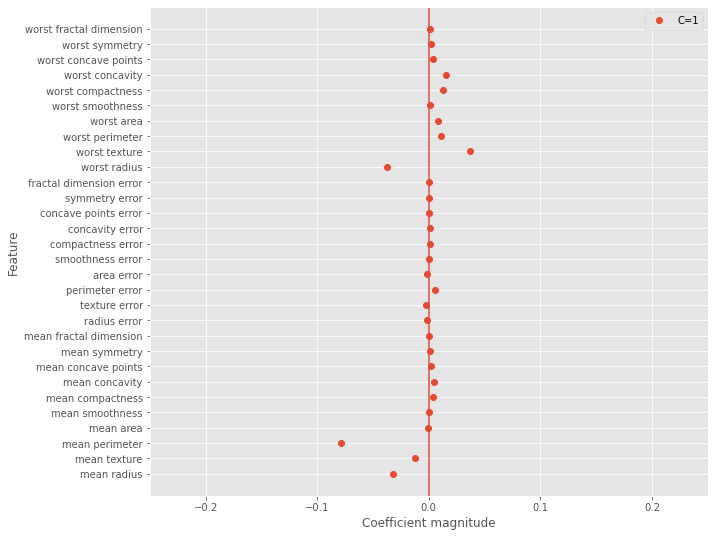

In [8]:
# Using similar visualization, we see that the coefficients here are much less in value as compared to
# logistic regression. The same features however are highlighted.

base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

plt.plot(linear_svm.coef_.T, 'o', label="C=1",  transform= rot + base)
plt.yticks(range(data.data.shape[1]), data.feature_names, rotation=0)
ylims = plt.ylim()
plt.vlines(0, ylims[0], ylims[1])
plt.ylim(ylims)
plt.xlim(-0.25, 0.25)
plt.ylabel("Feature")
plt.xlabel("Coefficient magnitude")
plt.legend()